## P2 Investigate a Dataset

For this project, I've decided to investigate a classic dataset: the Titanic passenger dataset. This dataset encompasses 891 individuals aboard the Titanic when it sailed that fateful day. It has has demographic, trip and economic data (in the form of fare price, cabin class, etc.).

I'll be following the data analysis process as outlined by the Udacity class:

<img src="files/images/data-analysis-process.png" height="200", width="500" align="left"></img>

## Question Phase

- Were the young and old likelier to survive?
- Was there a difference in survival rate for different genders?
- Did socioeconomic status have an impact on survival rate? 

## Wrangling Phase (Cleaning the Data)

I wanted to first clean the data by doing the following:
- Checking if I loaded the CSV data correctly
- Check each series (column) for discrepancies
- Making sure each column in the DataFrame object had the right data type

In [298]:
import seaborn as sns, pandas as pd, matplotlib.pyplot as plt, numpy as np
% matplotlib inline

data = pd.read_csv('data/titanic-data.csv')

# Cursory glance to see if data loaded correctly
print data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [299]:
'''Quick check at unique values for non-unique columns (i.e. excluding name and PassengerId).
Did this to find and fix any easily visible anomalies. Found a few NaN values resulting from incorrect series dtypes.


for c in data.columns.values:
    if c == 'PassengerId' or c == 'Name':
        pass
    else:
        print c, "\n", data[c].unique(), '\n\n'
'''

#Originally did data = data.fillna('') but this converted dtypes due to empty string not being valid for float, int
# Decided to leave as NaN, does not affect analysis. Chose not to data.fill(0) because Age=0 not right
data['Cabin'] = data['Cabin'].fillna('')

# Adding a new field, Cclass, which is a column with cabin class only
# Also important to note, some passengers have several 'Cabin' values but for each time this happens,
# all listed values have the same prefix letter, so I left my code as is.
cclass_list = []
for i in data['Cabin']:
    if i=='':
        cclass_list.append('')
    else:
        cclass_list.append(i[0:1])

data['Cclass'] = pd.Series(cclass_list, index=data.index)
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cclass
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,,S,
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,,S,
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,,Q,


#### Few closing comments RE my first look at the data

> I don't think it's particularly useful to look at 'PassengerId', 'Name', 'Ticket', 'Embarked' as predictors for survival so I'm excluding them in my analysis and conclusions. 'PassengerId' is pretty much another indexing field, 'Embarked' contains the same info you would want from 'Ticket' (prefixes of the ticket contain port of embarcation it seems). 'Embarked' is not so meaningful provided there are no large demographic differences between each port of embarcation. If anything, it might be worthy to examine how correlated 'Emabarked' is with other demographic data we have, but I'm leaving that out.
- Name: analyzing the origin of people's last names could give insight into whether different nationalities or ethnicities had higher survival rates. Or analyzing the salutation (Mr., Mrs., etc.) might yield something as well, but disregarding for now.

## Explore Phase

### Sex, Pclass

Preface: 0 means did not survive, 1 means survived.

It's fairly obvious to see that females had a higher survival rate. As shown by the upper left figure, we can see that females had around .75 survival rate; given by: $$\frac{# of female survivors}{all female passengers}$$

We can also see that Pclass (Passenger Class, a proxy for socioeconomic status, SES) shows a distinct trend. Individuals in a higher passenger class had higher survival rates and counts (bottom 2 charts).

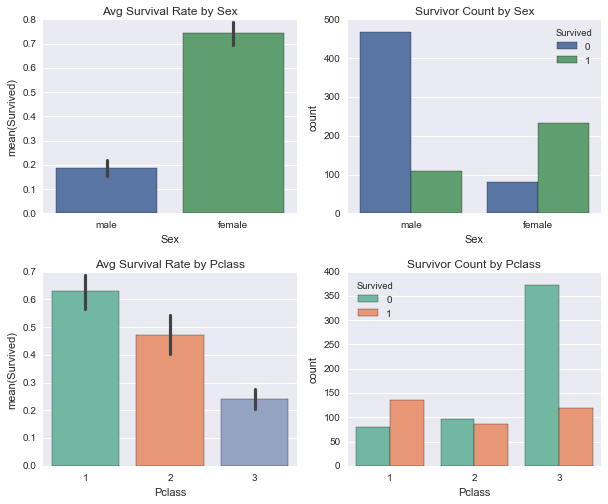

In [300]:
survived, pclass, sex, age, sibsp, parch, fare, embarked, cclass = data['Survived'], data['Pclass'], data['Sex'], data['Age'],data['SibSp'], data['Parch'], data['Fare'], data['Embarked'], data['Cclass']

# Sex and Pclass first

# Personal: barplot() performs aggregation by calculating a statistic (mean: (Surviving Males/All Males), (Surviving Females/All Females)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
fig.subplots_adjust(hspace=.3)

sns.barplot(x=sex, y=survived, ax=ax1).set_title('Avg Survival Rate by Sex')
sns.countplot(x=sex, hue=survived, ax=ax2).set_title('Survivor Count by Sex')
sns.barplot(x=pclass, y=survived, ax=ax3, palette='Set2').set_title('Avg Survival Rate by Pclass')
sns.countplot(x=pclass, hue=survived, ax=ax4, palette='Set2').set_title('Survivor Count by Pclass')

### Examining Sex and Pclass Together

From looking at Sex and Pclass separately, I hypothesized I would see a similarly clear trend if I looked at them together. The above shows that indeed males in Pclass 3 had the highest incidence of mortality. As we go up in Pclass for males, we see that while absolute count of mortality sharpyly declines, there is not a huge difference in count of survivors across the Pclasses.

You see a similar trend for females. As Pclass goes up, mortality count goes down but survivor count only slightly goes up. At Pclass = 1 for females, there are barely any who did not survive.

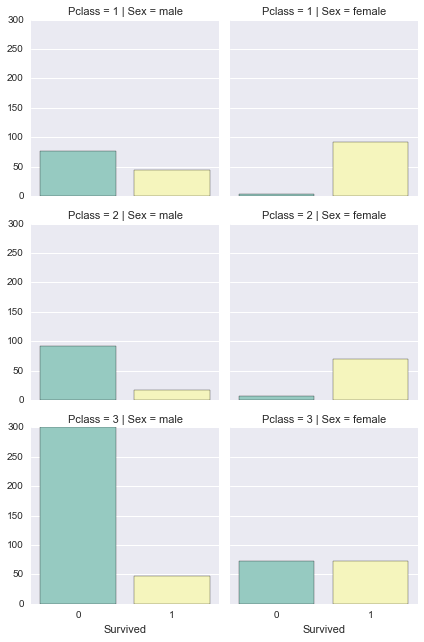

In [301]:
# Checking Sex-Pclass combinations
g = sns.FacetGrid(data, col='Sex', row='Pclass')
g = g.map(sns.countplot, 'Survived', palette='Set3')

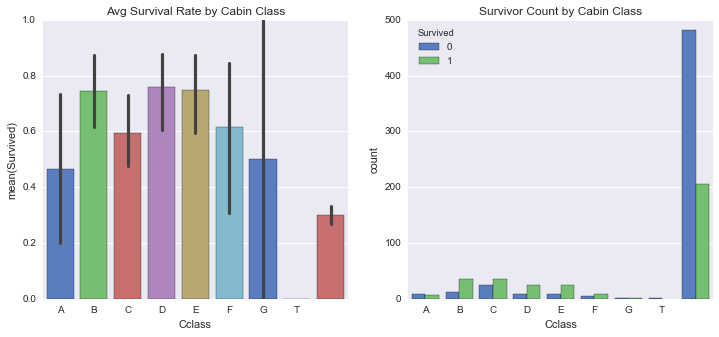

In [302]:
# Looking at Cclass, embarked

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
order_plot = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', '']

sns.barplot(x=cclass, y=survived, ax=ax1, palette='muted', order=order_plot).set_title('Avg Survival Rate by Cabin Class')
sns.countplot(x=cclass, hue=survived, ax=ax2, palette='muted', order=order_plot).set_title('Survivor Count by Cabin Class')

# Noticed a huge bunch of passengers with no Cabin Class, so explored futher...

In [303]:
# Showed passenger count and median fare for each class
d, d1 = data.groupby(['Cclass']).count()['Survived'], data.groupby(['Cclass']).median()['Fare']
pd.concat([d, d1], axis=1)

# Since there are so many unclassified, decided to assign them values based on their median fare...

,Survived,Fare
Cclass,,
,687,10.50000
A,15,35.50000
B,47,80.00000
C,59,83.47500
D,33,53.10000
E,32,45.18125
F,13,13.00000
G,4,13.58125
T,1,35.50000


In [304]:
# Checking descriptive stats for Fare with Cclass=''
data.groupby(['Cclass']).describe()[0:8]

Age        Fare       Parch  PassengerId      Pclass  \
Cclass                                                                      
       count  529.000000  687.000000  687.000000   687.000000  687.000000   
       mean    27.555293   19.157325    0.365357   443.208151    2.639010   
       std     13.472634   28.663343    0.827106   259.215905    0.589602   
       min      0.420000    0.000000    0.000000     1.000000    1.000000   
       25%           NaN    7.877100    0.000000   214.500000    2.000000   
       50%           NaN   10.500000    0.000000   441.000000    3.000000   
       75%           NaN   23.000000    0.000000   664.500000    3.000000   
       max     74.000000  512.329200    6.000000   891.000000    3.000000   

                   SibSp    Survived  
Cclass                                
       count  687.000000  687.000000  
       mean     0.547307    0.299854  
       std      1.207492    0.458528  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    1.000000  
       max      8.000000    1.000000

In [305]:
# Given Fare for empty Cclass has a relatively small IQR and median seems close to Cclass F or G, decided to put unclassified into class G
data['Cclass'].replace('', 'G', inplace=True)

# Fixed!
d2, d3 = data.groupby(['Cclass']).count()['Survived'], data.groupby(['Cclass']).median()['Fare']
pd.concat([d2, d3], axis=1)

,Survived,Fare
Cclass,,
A,15,35.50000
B,47,80.00000
C,59,83.47500
D,33,53.10000
E,32,45.18125
F,13,13.00000
G,691,10.50000
T,1,35.50000


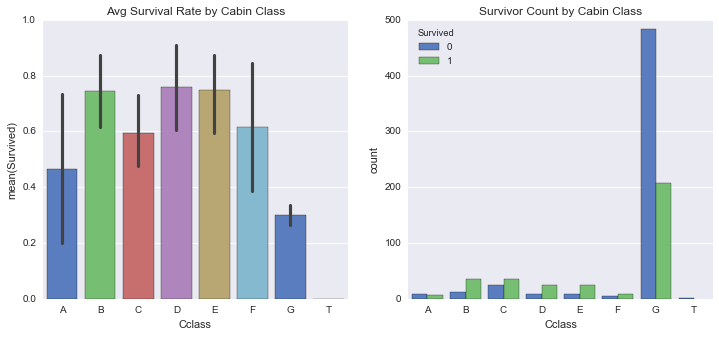

In [306]:
# Corrected Cclass graphs

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
order_plot_new, cclass_new = order_plot[:-1], data['Cclass']

sns.barplot(x=cclass_new, y=survived, ax=ax1, palette='muted', order=order_plot_new).set_title('Avg Survival Rate by Cabin Class')
sns.countplot(x=cclass_new, hue=survived, ax=ax2, palette='muted', order=order_plot_new).set_title('Survivor Count by Cabin Class')

# Survivor rate slightly dropped for class G. Survival rate is also now more meaningful, but Survivor count is less so

### Age

From the histograms of each survival condition by age and the PDF estimate, we can see the shape of the distribution as follows:
- Non-survivors have a high frequency in the 20-30. The distribution is slightly skewed to the left.
- Survivors have a flatter distribution, with a higher frequency at the 0-10 age range (young children).
- The spread of non-survivors seems to be wider; there are a few occurrences in the 60-75 age range whereas the same does not really occur for survivors.
- The estimated PDF reflects this idea and visualizes it a bit better. You can see the skew of non-survivors more prominent around age=20, and survivors as flatter with another small 'peak' close to age=0.

(0, 100)

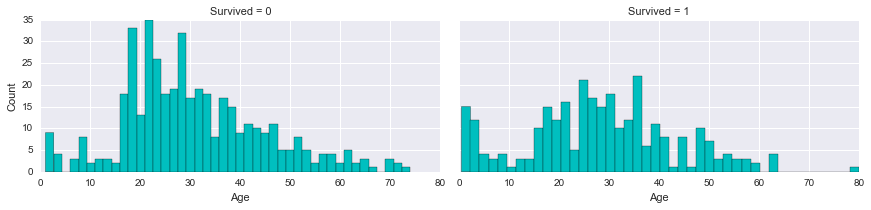

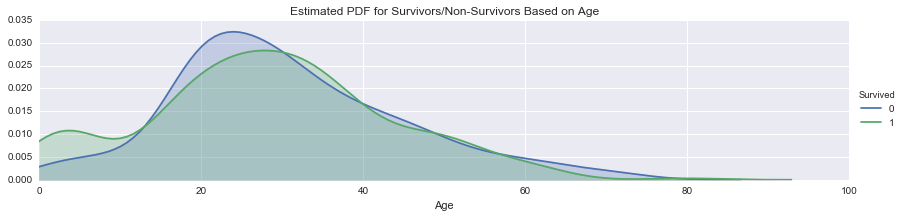

In [312]:
# Age

g1 = sns.FacetGrid(data, col='Survived', aspect=2)
g1 = g1.map(plt.hist,'Age', bins=len(age.unique())/2, color='c').set_ylabels('Count')

# Thought it would be interesting to create a PDF for both survive and not survive conditions.
g2 = sns.FacetGrid(data, hue='Survived',aspect=4)
g2 = g2.map(sns.kdeplot, 'Age', shade=True).add_legend()

g2.ax.set_title('Estimated PDF for Survivors/Non-Survivors Based on Age')
g2.ax.set_xlim(0,100)

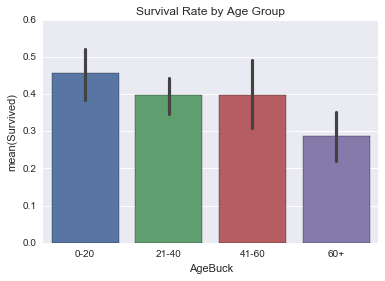

In [320]:
# create buckets
l = list()
for i in age:
    if i < 21.0:
        l.append('0-20')
    elif i < 41.0:
        l.append('21-40')
    elif i < 61.0:
        l.append('41-60')
    else:
        l.append('60+')
data['AgeBuck'] = pd.Series(l, index=data.index)

sns.barplot(x=data['AgeBuck'], y=survived, order=['0-20','21-40','41-60','60+']).set_title('Survival Rate by Age Group')

## Conclusion Phase

- Were the young and old likelier to survive?
> The old were likelier not to survive. Survival rate is lowest for the 60+ age group at ~.27, contrast this with the 0-20 group with the highest survival rate at ~.45

> This paints a different story from the PDF estimate, which shows the likelihood that a survivor or non-survivor from their own pool, is of a certain age. The PDF is not a great indicator to answer my original question because it doesn't control for the higher frequency in other age groups (see note below).

> The young were indeed likelier to survive, with the highest survival rate.

> Note: From my understanding there is a difference in using the PDF estimate and survival rate by age buckets in terms of semantics. Age bucket bar plot is looking at survival rates within those buckets only. The PDF can be interpreted as something like: 'From ALL survivors, what is the probability that survivor is of this age'. Answering my question can be done by both visualizations but with different repercussions. ---- A little unsure about all this.

- Was there a difference in survival rate for different genders?

> Females had a significantly higher survival rate (~.75)

- Did socioeconomic status have an impact on survival rate? 

> I used Pclass and Cclass as indicators for SES. On Pclass, though the number of non-survivors decreases as you go up in Pclass, the count of survivors is not that much different across Pclasses. This is not as important an observation though as the survival rate is what matters most; higher Pclasses have higher survival rates. Interestingly enough, if you look at Pclass and Sex together, you'll find that there are barely any women who perished at Pclass=1 or 2.

> On Cclass, cabin classes B and C had the highest median fare. Despite this only C had a relatively high survival rate (compared to survival rate of all diff cabin classes). This could signify a confound such as physical location on the boat (i.e. proximity to life rafts, proximity to collision point, etc.). The highest survival rates belong to cabin class C, D and E, with D and E having the second highest 'fare class' (median fare around 50). Cabin classes with the lowest 'fare class' (median fare at around 10) had the lowest survival rates, though cabin class F did have a relatively high survival rate, again possibly due to confounds.

## Future

The Titanic dataset is a classic machine learning exercise and I'm looking to submit something for the evergreen Kaggle competition they have. I would have spent far more time filling in the missing data if I was going to treat it as a machine learning problem. 

Personal notes for myself:
- Creating dummy variables for the many categorical variables in the dataset.
- Revisit decision trees, random forests, Gini impurity, and entropy [information gain]) - UW course.